In [1]:
%matplotlib inline
%precision 3

import numpy as np
import pandas as pd
from numpy.random import randn
from numpy import corrcoef, arange
np.random.seed(123)
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10


import datetime

from numpy import nan as NA

#### Data loading & Reading

In [2]:
!head NCDB_1999_to_2014_s.csv

In [3]:
accident=pd.read_csv('NCDB_1999_to_2014_s.csv', engine='python')
accident.columns = accident.columns.map(lambda x: x[:].lower())
accident

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,2013,06,2,12,2,02,21,02,1,1,...,02,01,2005,01,M,28,11,2,02,1
1,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,01,F,42,11,1,02,1
2,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,02,M,04,12,2,01,2
3,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,03,F,33,98,2,UU,U
4,2013,06,2,08,2,02,36,02,1,1,...,01,01,2005,01,F,44,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491543,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
491544,2014,UU,U,23,2,01,06,05,1,1,...,01,14,2006,01,M,29,96,2,09,5
491545,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
491546,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U


In [4]:
accident=accident.sort_values(['c_year','c_mnth','c_wday','c_hour'], ascending = True)
accident
#data[['C_VEHS']] = data[['C_VEHS']].str.extract('(\d+)', expand=False)                        
#data[['C_VEHS']] = data[['C_VEHS']].fillna(-1).astype(int)

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
373,2013,06,2,00,2,02,36,03,1,1,...,01,01,2010,01,M,52,11,1,NN,1
374,2013,06,2,00,2,02,36,03,1,1,...,02,01,2001,01,F,41,11,2,02,1
594,2013,06,2,00,2,01,01,01,1,1,...,01,01,UUUU,01,U,UU,UU,U,UU,U
595,2013,06,2,00,2,01,01,01,1,1,...,99,NN,NNNN,01,F,21,99,2,UU,3
881,2013,06,2,00,2,01,06,UU,1,1,...,01,01,2003,01,M,31,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491539,2014,UU,U,UU,2,UU,UU,01,U,U,...,09,01,UUUU,01,M,38,11,1,NN,1
491540,2014,UU,U,UU,2,UU,UU,01,U,U,...,10,01,UUUU,01,F,79,11,1,NN,1
491541,2014,UU,U,UU,2,UU,UU,01,U,U,...,11,01,UUUU,01,F,20,11,1,NN,1
491542,2014,UU,U,UU,2,UU,UU,01,U,U,...,12,01,UUUU,01,F,47,11,1,NN,1


In [5]:
#Copy of the dataset
data = accident[:]
#Convert any non-numeric value to np.Nan (I applied these to the columns I'm using for my analysis)
data[['c_mnth','c_wday','c_hour','c_sev','c_vehs','c_conf','c_wthr','c_raln','p_psn','p_safe']] = data[['c_mnth','c_wday','c_hour','c_sev','c_vehs','c_conf','c_wthr','c_raln','p_psn','p_safe']].replace('^([A-Za-z])+$', np.nan, regex=True)
data

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
373,2013,06,2,00,2,02,36,03,1,1,...,01,01,2010,01,M,52,11,1,NaN,1
374,2013,06,2,00,2,02,36,03,1,1,...,02,01,2001,01,F,41,11,2,02,1
594,2013,06,2,00,2,01,01,01,1,1,...,01,01,UUUU,01,U,UU,NaN,U,NaN,U
595,2013,06,2,00,2,01,01,01,1,1,...,99,NN,NNNN,01,F,21,99,2,NaN,3
881,2013,06,2,00,2,01,06,UU,1,1,...,01,01,2003,01,M,31,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491539,2014,NaN,NaN,NaN,2,NaN,NaN,01,NaN,U,...,09,01,UUUU,01,M,38,11,1,NaN,1
491540,2014,NaN,NaN,NaN,2,NaN,NaN,01,NaN,U,...,10,01,UUUU,01,F,79,11,1,NaN,1
491541,2014,NaN,NaN,NaN,2,NaN,NaN,01,NaN,U,...,11,01,UUUU,01,F,20,11,1,NaN,1
491542,2014,NaN,NaN,NaN,2,NaN,NaN,01,NaN,U,...,12,01,UUUU,01,F,47,11,1,NaN,1


In [6]:
#Drop the missing values
data.dropna(axis=0,subset=['c_mnth','c_wday','c_hour','c_sev','c_vehs','c_conf','c_wthr','c_raln','p_psn','p_safe'],inplace=True)
data

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
374,2013,06,2,00,2,02,36,03,1,1,...,02,01,2001,01,F,41,11,2,02,1
1033,2013,06,2,00,2,01,06,01,1,1,...,01,QQ,1996,01,M,41,11,2,02,U
1258,2013,06,2,00,2,02,32,01,3,2,...,01,01,1998,01,M,26,11,2,02,1
1259,2013,06,2,00,2,02,32,01,3,2,...,01,01,1998,02,M,21,13,2,02,2
1260,2013,06,2,00,2,02,32,01,3,2,...,01,01,1998,03,M,28,23,2,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490783,2014,12,7,23,2,03,21,02,1,5,...,02,01,1998,01,M,35,11,2,02,1
490784,2014,12,7,23,2,03,21,02,1,5,...,02,01,1998,02,F,32,13,2,02,2
491320,2014,12,7,23,2,01,33,02,3,4,...,01,14,1993,01,M,40,11,2,09,5
491372,2014,12,7,23,2,01,04,01,2,3,...,01,01,2006,01,M,17,11,2,02,1


In [7]:
#This process is to eliminate the '0' preceding a single digit number. ex. 01 --> 1
data[['c_vehs','c_conf','p_safe']] = data[['c_vehs','c_conf','p_safe']].fillna(-1).astype(int)
data

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
374,2013,06,2,00,2,2,36,03,1,1,...,02,01,2001,01,F,41,11,2,2,1
1033,2013,06,2,00,2,1,6,01,1,1,...,01,QQ,1996,01,M,41,11,2,2,U
1258,2013,06,2,00,2,2,32,01,3,2,...,01,01,1998,01,M,26,11,2,2,1
1259,2013,06,2,00,2,2,32,01,3,2,...,01,01,1998,02,M,21,13,2,2,2
1260,2013,06,2,00,2,2,32,01,3,2,...,01,01,1998,03,M,28,23,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490783,2014,12,7,23,2,3,21,02,1,5,...,02,01,1998,01,M,35,11,2,2,1
490784,2014,12,7,23,2,3,21,02,1,5,...,02,01,1998,02,F,32,13,2,2,2
491320,2014,12,7,23,2,1,33,02,3,4,...,01,14,1993,01,M,40,11,2,9,5
491372,2014,12,7,23,2,1,4,01,2,3,...,01,01,2006,01,M,17,11,2,2,1


In [8]:
#Slice the columns for my section of the data analysis
df = data.loc[:,['c_year','c_mnth','c_wday','c_hour','c_sev','c_vehs','c_conf','c_wthr','c_raln','p_psn','p_safe']]
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_wthr,c_raln,p_psn,p_safe
374,2013,06,2,00,2,2,36,1,1,11,2
1033,2013,06,2,00,2,1,6,1,1,11,2
1258,2013,06,2,00,2,2,32,3,2,11,2
1259,2013,06,2,00,2,2,32,3,2,13,2
1260,2013,06,2,00,2,2,32,3,2,23,2
...,...,...,...,...,...,...,...,...,...,...,...
490783,2014,12,7,23,2,3,21,1,1,11,2
490784,2014,12,7,23,2,3,21,1,1,13,2
491320,2014,12,7,23,2,1,33,3,2,11,9
491372,2014,12,7,23,2,1,4,2,1,11,2


In [9]:
#Generate the date-time column "date", and assign it as the index.
df['date'] = pd.PeriodIndex(df['c_year'].map(str) + '-' + df['c_mnth'], freq='M')
df=df.set_index('date')
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_wthr,c_raln,p_psn,p_safe
date,,,,,,,,,,,
2013-06,2013,06,2,00,2,2,36,1,1,11,2
2013-06,2013,06,2,00,2,1,6,1,1,11,2
2013-06,2013,06,2,00,2,2,32,3,2,11,2
2013-06,2013,06,2,00,2,2,32,3,2,13,2
2013-06,2013,06,2,00,2,2,32,3,2,23,2
...,...,...,...,...,...,...,...,...,...,...,...
2014-12,2014,12,7,23,2,3,21,1,1,11,2
2014-12,2014,12,7,23,2,3,21,1,1,13,2
2014-12,2014,12,7,23,2,1,33,3,2,11,9


In [10]:
#Number of vehicles involved in collision 
df['c_vehs'].describe()

count    331890.000000
mean          2.080894
std           1.144120
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          57.000000
Name: c_vehs, dtype: float64

Text(0.5,0,'Date')

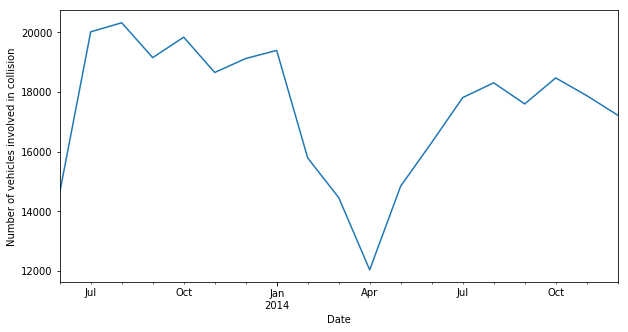

In [11]:
#Number of vehicles involved in collision & Collision date 
vehs=df.groupby('date')['c_vehs'].count()
vehs.plot(figsize=(10,5));
plt.ylabel('Number of vehicles involved in collision')
plt.xlabel('Date')

Text(0.5,0,'Year')

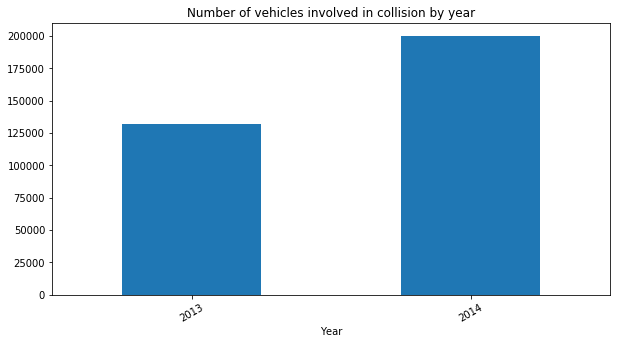

In [12]:
year = df.groupby('c_year')['c_vehs'].count()
year.plot(figsize=(10,5), kind='bar', rot =30, title='Number of vehicles involved in collision by year')
plt.xlabel('Year')

Text(0,0.5,'Total Number of vehicles involved in collision')

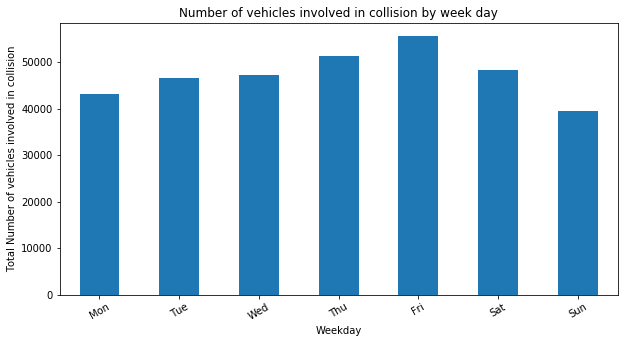

In [13]:
weekday = df.groupby('c_wday')['c_vehs'].count()
weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday.plot(figsize=(10,5),kind='bar',title='Number of vehicles involved in collision by week day', rot=30)
plt.xlabel('Weekday')
plt.ylabel('Total Number of vehicles involved in collision')

Text(0.5,0,'Hour')

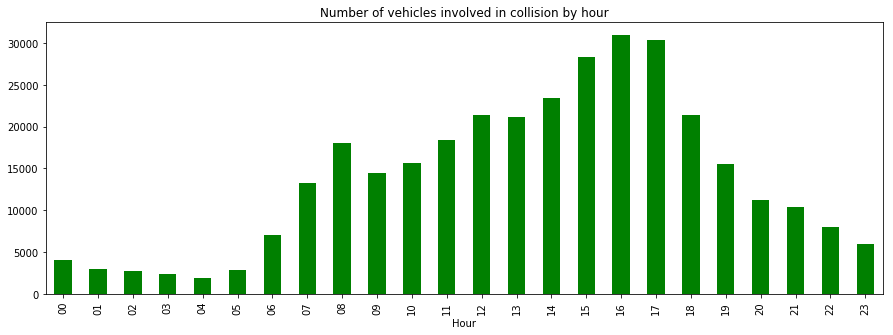

In [14]:
# Number of vehicles involved in collision by hour
plt.figure(figsize=(15,5))
hour = df.groupby('c_hour')['c_vehs'].count()
hour.plot(kind='bar',title='Number of vehicles involved in collision by hour',color='G')
plt.xlabel('Hour')

Text(0,0.5,'Collision severity')

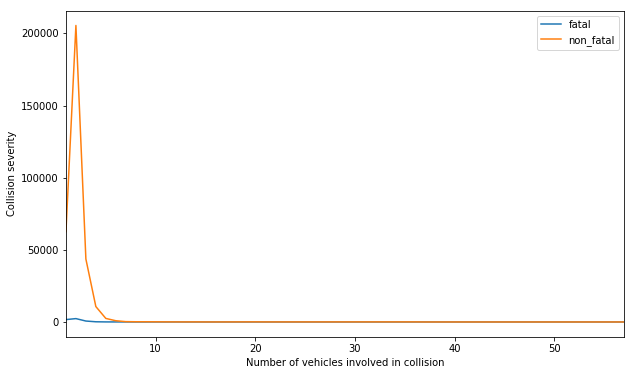

In [23]:
#Relationship between number of vehicles involved in collision and Collision severity
df['fatal']=np.where(df['c_sev']==1,1,0)
df['non_fatal']=np.where(df['c_sev']==2,1,0)

plt.figure(figsize=(15,5))
vehs_sev=df.groupby('c_vehs')['fatal','non_fatal'].sum()
vehs_sev.plot()
plt.xlabel('Number of vehicles involved in collision')
plt.ylabel('Collision severity')

Text(0,0.5,'Collision severity')

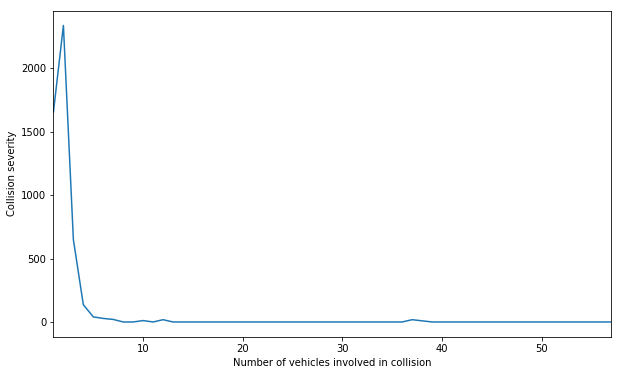

In [25]:
vehs_sev['fatal'].plot()
plt.xlabel('Number of vehicles involved in collision')
plt.ylabel('Collision severity')

Text(0,0.5,'Number of vehicles involved in collision')

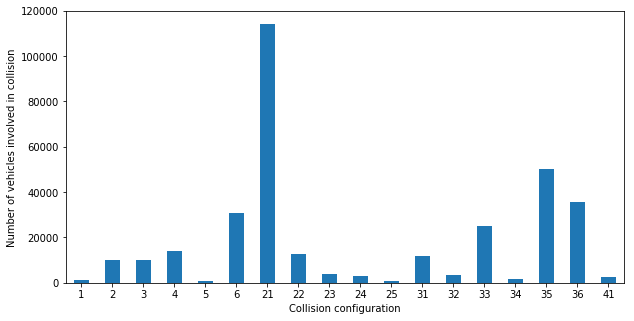

In [35]:
#Number of vehicles involved in collision & Collision configuration
vehs_conf=df.groupby('c_conf')['c_vehs'].count().sort_index(ascending=True)
vehs_conf.plot(figsize=(10,5), kind='bar', rot=0)
plt.xlabel('Collision configuration')
plt.ylabel('Number of vehicles involved in collision')

In [43]:
conf_sev=df.groupby('c_conf')['fatal','non_fatal'].sum()
conf_sev

,fatal,non_fatal
c_conf,,
1,31,1177
2,192,9759
3,361,9863
4,454,13345
5,21,753
...,...,...
33,220,24810
34,6,1740
35,615,49753


Text(0,0.5,'Sum of collision severity')

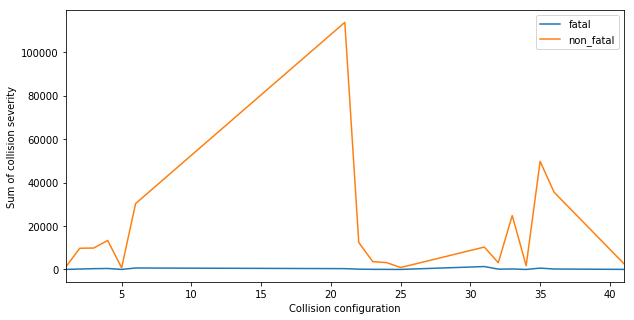

In [45]:
conf_sev.plot(figsize=(10,5))
plt.xlabel('Collision configuration')
plt.ylabel('Sum of collision severity')